In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
import itertools
from tabulate import tabulate
import os

In [2]:
df = pd.read_csv('/home/sourav/major/Packet Trace.csv', encoding='latin-1')

In [3]:
df

,PACKET_ID,SEGMENT_ID,PACKET_TYPE,CONTROL_PACKET_TYPE/APP_NAME,SOURCE_ID,DESTINATION_ID,TRANSMITTER_ID,RECEIVER_ID,APP_LAYER_ARRIVAL_TIME(µS),TRX_LAYER_ARRIVAL_TIME(µS),...,SEQ_NO,ACK_NO,isSyn,isAck,isFin,SEGMENT_LEN,SOURCE_IP,DESTINATION_IP,GATEWAY_IP,NEXT_HOP_IP
0,0,NaN,Control_Packet,DSR_RREQ,NODE-9,Broadcast-0,NODE-9,NODE-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,192.168.0.10,255.255.255.255,192.168.0.10,255.255.255.255
1,0,NaN,Control_Packet,DSR_RREQ,NODE-9,Broadcast-0,NODE-9,NODE-2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,192.168.0.10,255.255.255.255,192.168.0.10,255.255.255.255
2,0,NaN,Control_Packet,DSR_RREQ,NODE-9,Broadcast-0,NODE-9,NODE-3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,192.168.0.10,255.255.255.255,192.168.0.10,255.255.255.255
3,0,NaN,Control_Packet,DSR_RREQ,NODE-9,Broadcast-0,NODE-9,NODE-4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,192.168.0.10,255.255.255.255,192.168.0.10,255.255.255.255
4,0,NaN,Control_Packet,DSR_RREQ,NODE-9,Broadcast-0,NODE-9,NODE-5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,192.168.0.10,255.255.255.255,192.168.0.10,255.255.255.255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80696,0,NaN,Control_Packet,WLAN_ACK,NODE-17,NODE-1,NODE-17,NODE-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-,-,-,-
80697,4434,0.0,CBR,App1_CBR,NODE-16,NODE-10,NODE-1,NODE-17,88660000.0,88660000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,192.168.0.17,192.168.0.11,192.168.0.2,192.168.0.18
80698,0,NaN,Control_Packet,WLAN_ACK,NODE-17,NODE-1,NODE-17,NODE-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-,-,-,-
80699,4432,0.0,CBR,App1_CBR,NODE-16,NODE-10,NODE-17,NODE-10,88620000.0,88620000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,192.168.0.17,192.168.0.11,192.168.0.18,192.168.0.11


In [4]:
def check_malicious(row):
    if row['PACKET_STATUS'] == 'Collided':
        return 'Malicious'
    malicious_nodes = ['NODE-3', 'NODE-5', 'NODE-7', 'NODE-9', 'NODE-11']
    if row['SOURCE_ID'] in malicious_nodes or row['TRANSMITTER_ID'] in malicious_nodes:
       return 'Malicious'
    else:
        return 'Normal'

In [5]:
df['Malicious/Normal'] = df.apply(check_malicious, axis=1)

In [6]:
df.to_csv('Updated_Packet_Trace2.csv', index=False)
df

,PACKET_ID,SEGMENT_ID,PACKET_TYPE,CONTROL_PACKET_TYPE/APP_NAME,SOURCE_ID,DESTINATION_ID,TRANSMITTER_ID,RECEIVER_ID,APP_LAYER_ARRIVAL_TIME(µS),TRX_LAYER_ARRIVAL_TIME(µS),...,ACK_NO,isSyn,isAck,isFin,SEGMENT_LEN,SOURCE_IP,DESTINATION_IP,GATEWAY_IP,NEXT_HOP_IP,Malicious/Normal
0,0,NaN,Control_Packet,DSR_RREQ,NODE-9,Broadcast-0,NODE-9,NODE-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,192.168.0.10,255.255.255.255,192.168.0.10,255.255.255.255,Malicious
1,0,NaN,Control_Packet,DSR_RREQ,NODE-9,Broadcast-0,NODE-9,NODE-2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,192.168.0.10,255.255.255.255,192.168.0.10,255.255.255.255,Malicious
2,0,NaN,Control_Packet,DSR_RREQ,NODE-9,Broadcast-0,NODE-9,NODE-3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,192.168.0.10,255.255.255.255,192.168.0.10,255.255.255.255,Malicious
3,0,NaN,Control_Packet,DSR_RREQ,NODE-9,Broadcast-0,NODE-9,NODE-4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,192.168.0.10,255.255.255.255,192.168.0.10,255.255.255.255,Malicious
4,0,NaN,Control_Packet,DSR_RREQ,NODE-9,Broadcast-0,NODE-9,NODE-5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,192.168.0.10,255.255.255.255,192.168.0.10,255.255.255.255,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80696,0,NaN,Control_Packet,WLAN_ACK,NODE-17,NODE-1,NODE-17,NODE-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-,-,-,-,Normal
80697,4434,0.0,CBR,App1_CBR,NODE-16,NODE-10,NODE-1,NODE-17,88660000.0,88660000.0,...,NaN,NaN,NaN,NaN,NaN,192.168.0.17,192.168.0.11,192.168.0.2,192.168.0.18,Normal
80698,0,NaN,Control_Packet,WLAN_ACK,NODE-17,NODE-1,NODE-17,NODE-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-,-,-,-,Normal
80699,4432,0.0,CBR,App1_CBR,NODE-16,NODE-10,NODE-17,NODE-10,88620000.0,88620000.0,...,NaN,NaN,NaN,NaN,NaN,192.168.0.17,192.168.0.11,192.168.0.18,192.168.0.11,Normal


In [7]:
malicious_count = df['Malicious/Normal'].value_counts()['Malicious']
normal_count = df['Malicious/Normal'].value_counts()['Normal']

print(f'Number of successful packets: {normal_count}')
print(f'Number of collided packets: {malicious_count}')

Number of successful packets: 56923
Number of collided packets: 23778


In [8]:
from sklearn.preprocessing import LabelEncoder
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(df)

In [9]:
df

,PACKET_ID,SEGMENT_ID,PACKET_TYPE,CONTROL_PACKET_TYPE/APP_NAME,SOURCE_ID,DESTINATION_ID,TRANSMITTER_ID,RECEIVER_ID,APP_LAYER_ARRIVAL_TIME(µS),TRX_LAYER_ARRIVAL_TIME(µS),...,ACK_NO,isSyn,isAck,isFin,SEGMENT_LEN,SOURCE_IP,DESTINATION_IP,GATEWAY_IP,NEXT_HOP_IP,Malicious/Normal
0,0,NaN,1,8,20,0,20,0,NaN,NaN,...,NaN,2,2,1,NaN,1,22,1,22,0
1,0,NaN,1,8,20,0,20,11,NaN,NaN,...,NaN,2,2,1,NaN,1,22,1,22,0
2,0,NaN,1,8,20,0,20,14,NaN,NaN,...,NaN,2,2,1,NaN,1,22,1,22,0
3,0,NaN,1,8,20,0,20,15,NaN,NaN,...,NaN,2,2,1,NaN,1,22,1,22,0
4,0,NaN,1,8,20,0,20,16,NaN,NaN,...,NaN,2,2,1,NaN,1,22,1,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80696,0,NaN,1,12,8,1,8,0,NaN,NaN,...,NaN,2,2,1,NaN,0,0,0,0,1
80697,4434,0.0,0,2,7,2,0,8,88660000.0,88660000.0,...,NaN,2,2,1,NaN,8,2,11,9,1
80698,0,NaN,1,12,8,1,8,0,NaN,NaN,...,NaN,2,2,1,NaN,0,0,0,0,1
80699,4432,0.0,0,2,7,2,8,1,88620000.0,88620000.0,...,NaN,2,2,1,NaN,8,2,9,2,1


In [10]:
print(df.dtypes)

PACKET_ID                         int64
SEGMENT_ID                      float64
PACKET_TYPE                       int64
CONTROL_PACKET_TYPE/APP_NAME      int64
SOURCE_ID                         int64
DESTINATION_ID                    int64
TRANSMITTER_ID                    int64
RECEIVER_ID                       int64
APP_LAYER_ARRIVAL_TIME(µS)      float64
TRX_LAYER_ARRIVAL_TIME(µS)      float64
NW_LAYER_ARRIVAL_TIME(µS)       float64
MAC_LAYER_ARRIVAL_TIME(µS)      float64
PHY_LAYER_ARRIVAL_TIME(µS)      float64
PHY_LAYER_START_TIME(µS)        float64
PHY_LAYER_END_TIME(µS)          float64
APP_LAYER_PAYLOAD(Bytes)        float64
TRX_LAYER_PAYLOAD(Bytes)        float64
NW_LAYER_PAYLOAD(Bytes)         float64
MAC_LAYER_PAYLOAD(Bytes)          int64
PHY_LAYER_PAYLOAD(Bytes)          int64
PHY_LAYER_OVERHEAD(Bytes)         int64
PACKET_STATUS                     int64
LOCAL_ADDRESS                     int64
REMOTE_ADDRESS                    int64
CWND                            float64


In [11]:
print(df.columns)

Index(['PACKET_ID', 'SEGMENT_ID', 'PACKET_TYPE',
       'CONTROL_PACKET_TYPE/APP_NAME', 'SOURCE_ID', 'DESTINATION_ID',
       'TRANSMITTER_ID', 'RECEIVER_ID', 'APP_LAYER_ARRIVAL_TIME(µS)',
       'TRX_LAYER_ARRIVAL_TIME(µS)', 'NW_LAYER_ARRIVAL_TIME(µS)',
       'MAC_LAYER_ARRIVAL_TIME(µS)', 'PHY_LAYER_ARRIVAL_TIME(µS)',
       'PHY_LAYER_START_TIME(µS)', 'PHY_LAYER_END_TIME(µS)',
       'APP_LAYER_PAYLOAD(Bytes)', 'TRX_LAYER_PAYLOAD(Bytes)',
       'NW_LAYER_PAYLOAD(Bytes)', 'MAC_LAYER_PAYLOAD(Bytes)',
       'PHY_LAYER_PAYLOAD(Bytes)', 'PHY_LAYER_OVERHEAD(Bytes)',
       'PACKET_STATUS', 'LOCAL_ADDRESS', 'REMOTE_ADDRESS', 'CWND', 'SEQ_NO',
       'ACK_NO', 'isSyn', 'isAck', 'isFin', 'SEGMENT_LEN', 'SOURCE_IP',
       'DESTINATION_IP', 'GATEWAY_IP', 'NEXT_HOP_IP', 'Malicious/Normal'],
      dtype='object')


In [12]:
df.columns = df.columns.str.strip()
df = df.drop([ 'REMOTE_ADDRESS'], axis=1)
df = df.drop([ 'LOCAL_ADDRESS'], axis=1)
df = df.drop([ 'MAC_LAYER_ARRIVAL_TIME(µS)'], axis=1)
df = df.drop([ 'NW_LAYER_ARRIVAL_TIME(µS)'], axis=1)
df = df.drop([ 'TRX_LAYER_ARRIVAL_TIME(µS)'], axis=1)
df = df.drop([ 'APP_LAYER_ARRIVAL_TIME(µS)'], axis=1)

df

,PACKET_ID,SEGMENT_ID,PACKET_TYPE,CONTROL_PACKET_TYPE/APP_NAME,SOURCE_ID,DESTINATION_ID,TRANSMITTER_ID,RECEIVER_ID,PHY_LAYER_ARRIVAL_TIME(µS),PHY_LAYER_START_TIME(µS),...,ACK_NO,isSyn,isAck,isFin,SEGMENT_LEN,SOURCE_IP,DESTINATION_IP,GATEWAY_IP,NEXT_HOP_IP,Malicious/Normal
0,0,NaN,1,8,20,0,20,0,100227.00,100691.00,...,NaN,2,2,1,NaN,1,22,1,22,0
1,0,NaN,1,8,20,0,20,11,100227.00,100691.00,...,NaN,2,2,1,NaN,1,22,1,22,0
2,0,NaN,1,8,20,0,20,14,100227.00,100691.00,...,NaN,2,2,1,NaN,1,22,1,22,0
3,0,NaN,1,8,20,0,20,15,100227.00,100691.00,...,NaN,2,2,1,NaN,1,22,1,22,0
4,0,NaN,1,8,20,0,20,16,100227.00,100691.00,...,NaN,2,2,1,NaN,1,22,1,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80696,0,NaN,1,12,8,1,8,0,99893651.00,99893806.00,...,NaN,2,2,1,NaN,0,0,0,0,1
80697,4434,0.0,0,2,7,2,0,8,99894059.11,99895054.11,...,NaN,2,2,1,NaN,8,2,11,9,1
80698,0,NaN,1,12,8,1,8,0,99895118.12,99895273.12,...,NaN,2,2,1,NaN,0,0,0,0,1
80699,4432,0.0,0,2,7,2,8,1,99895421.23,99898246.23,...,NaN,2,2,1,NaN,8,2,9,2,1


In [13]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

2024-05-05 10:19:58.858176: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-05 10:19:58.970590: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-05 10:19:59.428672: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-05 10:20:00.813146: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [14]:
X = df.drop('Malicious/Normal', axis=1)
y = df['Malicious/Normal']
y = to_categorical(y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
df['Malicious/Normal']

0        0
1        0
2        0
3        0
4        0
        ..
80696    1
80697    1
80698    1
80699    1
80700    1
Name: Malicious/Normal, Length: 80701, dtype: int64

In [17]:
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

RECURSIVE FEATURE ELIMINATION USING RANDOM FOREST CLASSIFIER

In [18]:

rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['SOURCE_ID',
 'DESTINATION_ID',
 'TRANSMITTER_ID',
 'RECEIVER_ID',
 'PHY_LAYER_ARRIVAL_TIME(µS)',
 'PHY_LAYER_START_TIME(µS)',
 'PHY_LAYER_END_TIME(µS)',
 'MAC_LAYER_PAYLOAD(Bytes)',
 'PACKET_STATUS',
 'SOURCE_IP']

In [19]:
X_train = X_train[selected_features]
# X_train
X_test=X_test[selected_features]
X_test


,SOURCE_ID,DESTINATION_ID,TRANSMITTER_ID,RECEIVER_ID,PHY_LAYER_ARRIVAL_TIME(µS),PHY_LAYER_START_TIME(µS),PHY_LAYER_END_TIME(µS),MAC_LAYER_PAYLOAD(Bytes),PACKET_STATUS,SOURCE_IP
23601,6,12,6,11,12986655.80,12986842.80,12986842.81,20,2,7
62322,7,2,7,14,58240872.62,58241865.62,58241865.63,1500,0,8
23307,19,14,19,13,12932629.25,12932762.25,12932762.26,48,0,21
16370,12,9,9,8,6753195.01,6753460.01,6753460.02,64,0,13
379,18,0,18,8,106736.22,107200.22,107200.23,32,0,20
...,...,...,...,...,...,...,...,...,...,...
54073,12,16,12,15,48402684.03,48402824.03,48402824.04,60,2,13
39691,11,7,11,6,30821762.24,30821917.24,30821917.25,0,2,0
71878,7,2,7,17,75381191.23,75383335.23,75383335.24,1508,0,8
59348,11,7,11,8,55440833.89,55440982.89,55440982.90,76,2,15


FEED FORWARD NEURAL NETWORK

In [20]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

/home/sourav/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
optimizer = Adam(learning_rate=0.0010)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [22]:
y = to_categorical(y)
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.5916 - loss: 26312.0723 - val_accuracy: 0.7101 - val_loss: 146.0708
Epoch 2/30
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5930 - loss: 551.7614 - val_accuracy: 0.7101 - val_loss: 171.9383
Epoch 3/30
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5937 - loss: 260.7985 - val_accuracy: 0.7040 - val_loss: 7.5030
Epoch 4/30
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5742 - loss: 398.1336 - val_accuracy: 0.2899 - val_loss: 10.8403
Epoch 5/30
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6538 - loss: 124.6423 - val_accuracy: 0.7101 - val_loss: 0.6024
Epoch 6/30
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7054 - loss: 0.6064 - val_accuracy: 0.7101 - val_loss: 0.6025
Epoch 7/30
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7045 - loss: 0.6071 - val_accuracy: 0.7101 - val_loss: 0.6021
Epoch 8/30
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7038 

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, recall_score
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
def print_scores(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    rec = recall_score(y_true, y_pred, average='weighted')
    print(f'Accuracy: {acc:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Recall: {rec:.4f}')

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

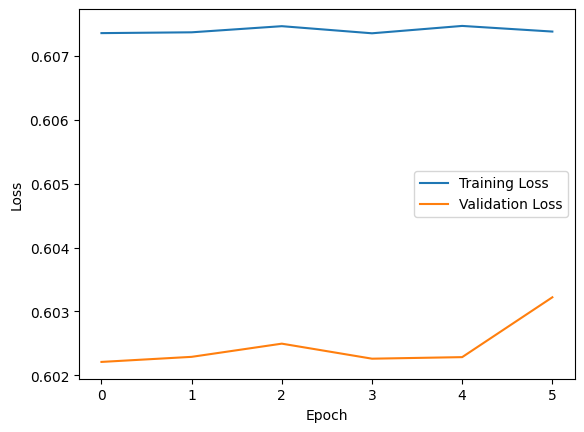

In [26]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=0)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [27]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

505/505 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.7136 - loss: 0.6004
Test Accuracy: 0.7101


In [28]:
custom_row = X_test.iloc[[12346]] 
prediction = model.predict(custom_row)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [29]:
print('Predicted Target Variable:', prediction[0])

Predicted Target Variable: [0.31155148 0.6884485 ]


In [30]:
from sklearn.metrics import classification_report

In [31]:
from sklearn.metrics import precision_recall_fscore_support
loss, accuracy = model.evaluate(X_test, y_test)
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba[:, 1] > 0.5).astype(int)
y_true = y_test.argmax(axis=1)
precision, recall, f1_score, support = precision_recall_fscore_support(y_true, y_pred, average='binary')

print(f'Test Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1_score:.4f}')
print(f'Support: {support}')

505/505 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.7136 - loss: 0.6004
505/505 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Test Accuracy: 0.7101
Precision: 0.7101
Recall: 1.0000
F1-score: 0.8304
Support: None


In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
cm = confusion_matrix(y_true, y_pred)

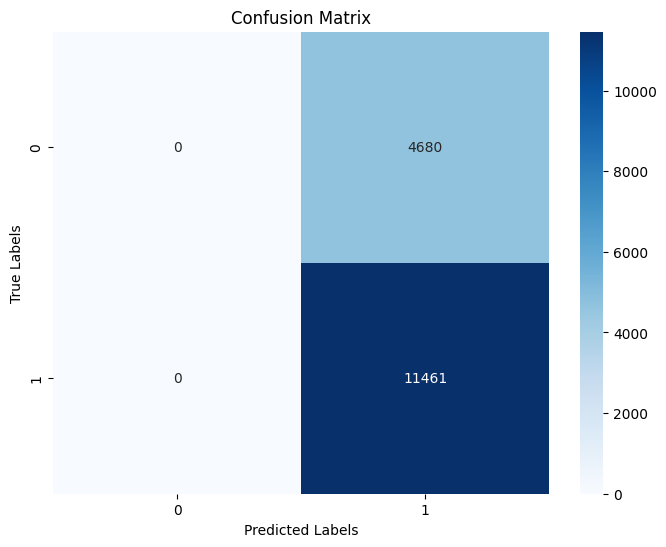

In [34]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [52]:
import keras
print(keras.__version__)

3.1.1


In [53]:
from keras.utils import plot_model
import matplotlib.pyplot as plt

In [54]:
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True, rankdir='TB')

# Display the plot
plt.figure(figsize=(12, 8))
plt.imshow(plt.imread('model_architecture.png'))
plt.axis('off')
plt.show()

You must install pydot (`pip install pydot`) for `plot_model` to work.


FileNotFoundError: [Errno 2] No such file or directory: 'model_architecture.png'

<Figure size 1200x800 with 0 Axes>